<a href="https://colab.research.google.com/github/gani0325/2021/blob/main/Deeplearning/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C/srcnn_20211118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
 
inputs = keras.Input(shape=(128, 128, 3), name='img')
 
x = layers.Conv2D(
         filters=64, # The number of convolutional layer neurons (convolution kernel)
         kernel_size=9, # Feel the size of the wild
         padding='same', # padding strategy (vaild or same)
         activation=tf.nn.relu # Activation function
)(inputs)
 
x = layers.Conv2D(
    filters=32,      
    kernel_size=1,
    padding='same',  
    activation=tf.nn.relu
)(x)
 
outputs = layers.Conv2D(
    filters=3,
    kernel_size=5,          
         padding='same' # Do not set the activation function
)(x)
 
model = keras.Model(inputs=inputs, outputs=outputs, name='SRCNN_model')# Create a model by specifying its inputs and outputs in the layer map
  
model.summary() # View the model summary, call after the model is built (instantiated)

Model: "SRCNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      15616     
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      2080      
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 3)       2403      
                                                                 
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________


# Download Data

In [2]:
import cv2
import numpy as np
import tensorflow as tf

'''
CIFAR10 had't 128*128*3 images use bicubic alternatived,and bicubic use nearest alternatived.
X_: image applied bicubic interpolation (low-resolution),(50000, 128, 128, 3)
y_: image with original resolution (high-resolution),(10000, 128, 128, 3)
'''
 
ishape = 128
 
# load data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
 
 # Reduce the data set, control the memory usage (the following win10, 8G memory is available)
train_image = train_images[0:1000]
test_image  = test_images[0:100]
 
X_train = np.array([cv2.resize(i,(ishape,ishape), interpolation=cv2.INTER_NEAREST) for i in train_image]) / 255.
X_test  = np.array([cv2.resize(i,(ishape,ishape), interpolation=cv2.INTER_NEAREST) for i in test_image]) / 255.
 
y_train = np.array([cv2.resize(i,(ishape,ishape), interpolation=cv2.INTER_CUBIC) for i in train_image]) / 255.
y_test  = np.array([cv2.resize(i,(ishape,ishape), interpolation=cv2.INTER_CUBIC) for i in test_image]) / 255.

170508288/170498071 [==============================] - 6s 0us/step


# Start training

In [3]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',       
              metrics=['mae']) # compile

In [4]:
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_split=0.2)# Training

Epoch 1/20
13/13 [==============================] - 60s 5s/step - loss: 3.9917 - mae: 0.8076 - val_loss: 0.0421 - val_mae: 0.1624
Epoch 2/20
13/13 [==============================] - 59s 5s/step - loss: 0.0266 - mae: 0.1188 - val_loss: 0.0179 - val_mae: 0.0997
Epoch 3/20
13/13 [==============================] - 58s 5s/step - loss: 0.0156 - mae: 0.0877 - val_loss: 0.0144 - val_mae: 0.0819
Epoch 4/20
13/13 [==============================] - 58s 4s/step - loss: 0.0138 - mae: 0.0808 - val_loss: 0.0131 - val_mae: 0.0780
Epoch 5/20
13/13 [==============================] - 59s 5s/step - loss: 0.0129 - mae: 0.0774 - val_loss: 0.0124 - val_mae: 0.0766
Epoch 6/20
13/13 [==============================] - 58s 4s/step - loss: 0.0123 - mae: 0.0754 - val_loss: 0.0120 - val_mae: 0.0757
Epoch 7/20
13/13 [==============================] - 59s 5s/step - loss: 0.0118 - mae: 0.0742 - val_loss: 0.0115 - val_mae: 0.0738
Epoch 8/20
13/13 [==============================] - 59s 5s/step - loss: 0.0114 - mae: 0.07

In [5]:
test_scores = model.evaluate(X_test, y_test, verbose=2) # evaluate
 
print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])

4/4 - 2s - loss: 0.0074 - mae: 0.0581 - 2s/epoch - 435ms/step
Test loss: 0.007408722769469023
Test mae: 0.05814889818429947


In [6]:
# Save entire model to a HDF5 file
model.save('SRCNN.h5')

In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',       
              metrics=['acc']) # compile

In [35]:
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_split=0.2)# Training

Epoch 1/20
13/13 [==============================] - 59s 5s/step - loss: 0.4157 - acc: 0.4365 - val_loss: 0.2755 - val_acc: 0.2407
Epoch 2/20
13/13 [==============================] - 58s 5s/step - loss: 0.0887 - acc: 0.3972 - val_loss: 0.0393 - val_acc: 0.2457
Epoch 3/20
13/13 [==============================] - 59s 5s/step - loss: 0.0232 - acc: 0.3315 - val_loss: 0.0205 - val_acc: 0.2616
Epoch 4/20
13/13 [==============================] - 59s 5s/step - loss: 0.0158 - acc: 0.3095 - val_loss: 0.0150 - val_acc: 0.3471
Epoch 5/20
13/13 [==============================] - 59s 5s/step - loss: 0.0138 - acc: 0.3343 - val_loss: 0.0134 - val_acc: 0.3485
Epoch 6/20
13/13 [==============================] - 59s 5s/step - loss: 0.0129 - acc: 0.3714 - val_loss: 0.0125 - val_acc: 0.3872
Epoch 7/20
13/13 [==============================] - 59s 5s/step - loss: 0.0121 - acc: 0.3999 - val_loss: 0.0117 - val_acc: 0.3907
Epoch 8/20
13/13 [==============================] - 58s 5s/step - loss: 0.0115 - acc: 0.36

In [36]:
test_scores = model.evaluate(X_test, y_test, verbose=2) # evaluate
 
print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])

4/4 - 2s - loss: 0.0063 - acc: 0.3788 - 2s/epoch - 428ms/step
Test loss: 0.006343023851513863
Test mae: 0.37875792384147644


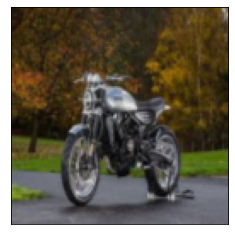

In [7]:
from matplotlib import pyplot as plt
 
ishape = 128
 
#Load the enlarged image and display
# img = cv.imread('automobile.png')
img = cv2.imread('//content//drive//MyDrive//가은//2021//딥러닝//딥러닝_기말//dataset//train//low_res//22.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
img = cv2.resize(img,(ishape,ishape), interpolation=cv2.INTER_NEAREST)# (36,36,3)->(128,128,3)
 
plt.imshow(img)
 
plt.xticks([]), plt.yticks([])
 
plt.show()

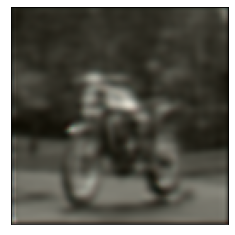

In [8]:
img = np.reshape(img,(1,ishape,ishape,3)) / 255.
 
 # Processing image super resolution
img_SR = model.predict(img)
 
plt.imshow(img_SR[0])
 
plt.xticks([]), plt.yticks([])
 
plt.show()

MSE 작을수록 PSNR 크면 크며 PSNR 크면 작을수록 화질이 좋습니다 .

* PSNR이 40dB 이상으로 화질이 우수함을 나타냅니다(즉, 원본 이미지에 매우 가깝습니다).
* 30-40dB 유지 일반적으로 화질이 좋다는 의미(즉, 왜곡은 감지할 수 있지만 허용 가능)
* 20-30dB 유지 불량한 이미지 품질
* 20dB 미만의 이미지는 허용되지 않습니다.

In [32]:
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = img
	compressed = img_SR
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()

PSNR value is 70.03535524949467 dB


ssim : 최대 값 1은 두 신호가 구조적으로 완벽하게 유사 함을 나타내고 0은 구조적 유사성이 없음

In [20]:
# Compute SSIM over tf.float32 Tensors.
img = tf.image.convert_image_dtype(img, tf.float32)
img_SR = tf.image.convert_image_dtype(img_SR, tf.float32)
ssim2 = tf.image.ssim(img, img_SR, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

In [33]:
print(ssim2)

tf.Tensor([[[0.61858934]]], shape=(1, 1, 1), dtype=float32)
